Mounted at /content/drive


<ipython-input-2-a0df33e5a0f6>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_data.at[i, 'emoji'] = splited[1]
<ipython-input-2-a0df33e5a0f6>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data.at[i, 'emoji'] = splited[1]


<text> =  I am proud of your achievements,2,,   <emoji> =  nan
True
<text> =  I am proud of your achievements   <emoji> =  2
Loaded 400000 word vectors.
Epoch 1/10
4/4 [==============================] - 156s 37s/step - loss: 3.3998 - accuracy: 0.2762 - val_loss: 3.2194 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 2/10
4/4 [==============================] - 152s 37s/step - loss: 3.1136 - accuracy: 0.2857 - val_loss: 3.1181 - val_accuracy: 0.1852 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - 152s 37s/step - loss: 3.1153 - accuracy: 0.2667 - val_loss: 3.0231 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - 148s 36s/step - loss: 2.9814 - accuracy: 0.3048 - val_loss: 2.9337 - val_accuracy: 0.1852 - lr: 0.0010
Epoch 5/10
4/4 [==============================] - 149s 36s/step - loss: 2.8531 - accuracy: 0.3333 - val_loss: 2.8501 - val_accuracy: 0.1852 - lr: 0.0010
Epoch 6/10
4/4 [==============================] - 148s 36s/step - loss: 2.7583 - a

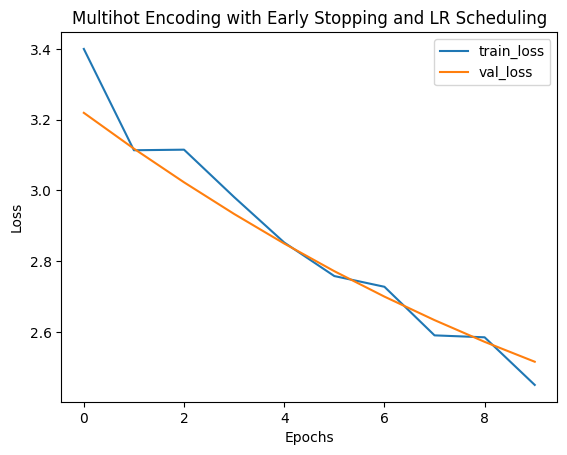

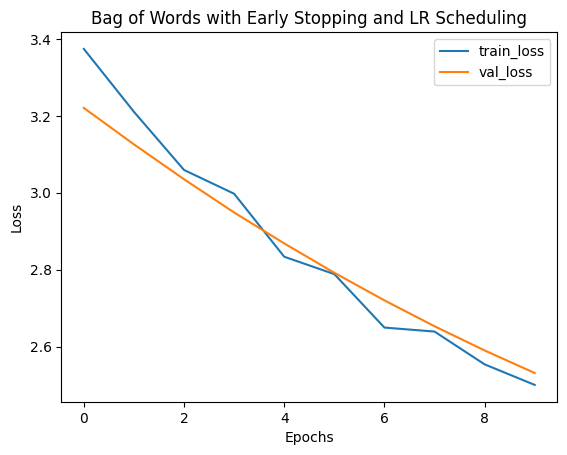

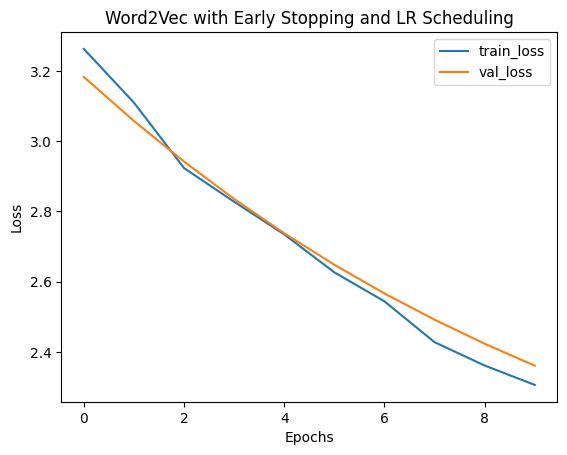

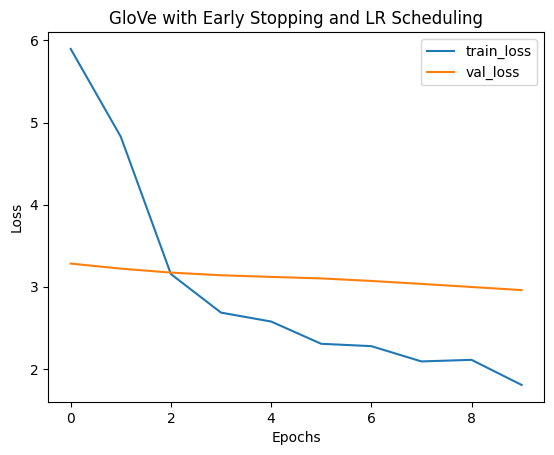

2/2 [==============================] - 10s 3s/step - loss: 2.5019 - accuracy: 0.3214
Multihot Accuracy:  0.3214285671710968
2/2 [==============================] - 10s 3s/step - loss: 2.5182 - accuracy: 0.2857
BOW Accuracy:  0.2857142984867096
2/2 [==============================] - 0s 25ms/step - loss: 2.3350 - accuracy: 0.3214
Word2Vec Accuracy:  0.3214285671710968
2/2 [==============================] - 0s 30ms/step - loss: 2.9560 - accuracy: 0.5893
GloVe Accuracy:  0.5892857313156128


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
import tensorflow as tf
from google.colab import drive
import zipfile
from tensorflow.keras.regularizers import l2  # اضافه شده برای رفع خطا

# اتصال به Google Drive
drive.mount('/content/drive')

# بارگذاری داده‌ها
train_data = pd.read_csv('/content/drive/My Drive/train_emoji.csv', names=['text', 'emoji'], sep='\t')
test_data = pd.read_csv('/content/drive/My Drive/tesss.csv', names=['text', 'emoji'], sep='\t')

print('<text> = ', train_data.loc[1,'text'], ' ','<emoji> = ' ,train_data.loc[1,'emoji'])
print(pd.isna(train_data.loc[1,'emoji']))

# اصلاح داده‌ها
for i in range(len(train_data)):
    splited = train_data.loc[i, 'text'].split(',')[:2]
    train_data.at[i, 'text'] = splited[0]
    train_data.at[i, 'emoji'] = splited[1]

print('<text> = ', train_data.loc[1,'text'], ' ','<emoji> = ' ,train_data.loc[1,'emoji'])

for i in range(len(test_data)):
    splited = test_data.loc[i, 'text'].split(',')[:2]
    test_data.at[i, 'text'] = splited[0]
    test_data.at[i, 'emoji'] = splited[1]

# پیش‌پردازش داده‌ها
X_train = train_data['text']
y_train = train_data['emoji']
X_test = test_data['text']
y_test = test_data['emoji']

# تبدیل لیبل‌ها به اعداد
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# تنظیم برخی از پارامترهای مهم
max_num_words = 10000
max_sequence_length = 100
embedding_dim = 100

# توکنیزه کردن داده‌ها
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# تبدیل متن به توکن‌ها
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# پدینگ توالی‌ها
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Multihot Encoding
X_train_multihot = tokenizer.sequences_to_matrix(X_train_sequences, mode='binary')
X_test_multihot = tokenizer.sequences_to_matrix(X_test_sequences, mode='binary')

# BOW (Bag of Words)
X_train_bow = tokenizer.sequences_to_matrix(X_train_sequences, mode='count')
X_test_bow = tokenizer.sequences_to_matrix(X_test_sequences, mode='count')

# آموزش Word2Vec
sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences=sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)
word2vec_model.train(sentences, total_examples=len(sentences), epochs=10)

# بارگذاری GloVe
# مسیر فایل ZIP در Google Drive
zip_path = '/content/drive/My Drive/archive.zip'

# استخراج فایل ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive')

# مسیر فایل GloVe استخراج شده
glove_path = '/content/drive/My Drive/glove.6B.100d.txt'

glove_model = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_model[word] = vector
print(f"Loaded {len(glove_model)} word vectors.")

def get_embedding_matrix(tokenizer, embedding_model, embedding_dim, model_type='word2vec'):
    embedding_matrix = np.zeros((max_num_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i >= max_num_words:
            continue
        if model_type == 'word2vec':
            embedding_vector = embedding_model[word] if word in embedding_model else None
        else:
            embedding_vector = embedding_model.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# ایجاد ماتریس‌های embedding
embedding_matrix_word2vec = get_embedding_matrix(tokenizer, word2vec_model.wv, embedding_dim, model_type='word2vec')
embedding_matrix_glove = get_embedding_matrix(tokenizer, glove_model, embedding_dim, model_type='glove')

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

def create_model(input_shape, embedding_matrix=None, is_bert=False):
    model = Sequential()
    if is_bert:
        model.add(Dense(128, activation='relu', input_shape=(input_shape[1], input_shape[2])))
        model.add(Flatten())
    else:
        if embedding_matrix is not None:
            model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], input_length=input_shape[1], trainable=False))
        else:
            model.add(Embedding(input_dim=max_num_words, output_dim=embedding_dim, input_length=input_shape[1]))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(BatchNormalization())
        model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

epochs = 10
batch_size = 32

# Model Multihot
model_multihot = create_model(X_train_multihot.shape)
history_multihot = model_multihot.fit(X_train_multihot, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size, callbacks=[early_stopping, reduce_lr])

# Model BOW
model_bow = create_model(X_train_bow.shape)
history_bow = model_bow.fit(X_train_bow, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size, callbacks=[early_stopping, reduce_lr])

# Model Word2Vec
model_word2vec = create_model(X_train_padded.shape, embedding_matrix=embedding_matrix_word2vec)
history_word2vec = model_word2vec.fit(X_train_padded, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size, callbacks=[early_stopping, reduce_lr])

# Model GloVe
model_glove = create_model(X_train_padded.shape, embedding_matrix=embedding_matrix_glove)
history_glove = model_glove.fit(X_train_padded, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size, callbacks=[early_stopping, reduce_lr])

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_multihot, 'Multihot Encoding with Early Stopping and LR Scheduling')
plot_loss(history_bow, 'Bag of Words with Early Stopping and LR Scheduling')
plot_loss(history_word2vec, 'Word2Vec with Early Stopping and LR Scheduling')
plot_loss(history_glove, 'GloVe with Early Stopping and LR Scheduling')

print("Multihot Accuracy: ", model_multihot.evaluate(X_test_multihot, y_test)[1])
print("BOW Accuracy: ", model_bow.evaluate(X_test_bow, y_test)[1])
print("Word2Vec Accuracy: ", model_word2vec.evaluate(X_test_padded, y_test)[1])
print("GloVe Accuracy: ", model_glove.evaluate(X_test_padded, y_test)[1])
